# **Datathon - Analysis of Champo Carpet Dataset**

### **Done by - The Night's watch**

In [ ]:
#Installing Packages
install.packages("pacman")       
library("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
pacman::p_load("pacman","tidyverse","rpart","rpart.plot","readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


rpart.plot installed



### Loading the Dataset

In [ ]:
#Dataset - Raw Data-Order and Sample
OrderSample <- read_xlsx("IMB881.xlsx",sheet = 2)
#Dataset - Data Order ONLY 
DataOrder <- read_xlsx("IMB881.xlsx", sheet = 3)
#Data on Sample ONLY
DataOnSample<- read_xlsx("IMB881.xlsx", sheet = 4)
#Data for Recommendation
DataForRecommendation <- read_xlsx("IMB881.xlsx", sheet = 5)
#Data for Clustering
DataForClustering <- read_xlsx("IMB881.xlsx",sheet = 6)
#Data-Association Rules A-11
AssociationRules <- read_xlsx("IMB881.xlsx", sheet = 7)

New names:
• `Customer` -> `Customer...1`
• `` -> `...22`
• `` -> `...23`
• `Customer` -> `Customer...24`
New names:
• `Order No` -> `Order No...1`
• `` -> `...9`
• `Order No` -> `Order No...10`


### Exploratory Dataset Analysis - EDA


*   For the Exploratorary Data analysis we have found that there are no outliers in OrderType, OrderCategory, CustomerCode,  CountryName, Custorderdate, UnitName whereas there are outliers in CustomerOrderNo, DataSample.
*   We have to convert : 

    1.   Converting values of categorical with character into factor format
 
    2.   Converting values of categorical with posix format into date format

*   There are a lot of NA Values and since '0' has occured most no of times we can consider replacing NA values with it








In [ ]:
#Creating backup for Order Sample Dataset
OrderSample2 <- OrderSample
    #There are no outliers in OrderType, OrderCategory, CustomerCode,  CountryName, Custorderdate, UnitName
  
    #Converting values of categorical with character into factor format
    OrderSample$OrderType<- as.factor(OrderSample$OrderType)
    OrderSample$OrderCategory <- as.factor(OrderSample$OrderCategory)
    OrderSample$CustomerCode <- as.factor(OrderSample$CustomerCode)
    OrderSample$CountryName <- as.factor(OrderSample$CountryName)
    OrderSample$UnitName <- as.factor(OrderSample$UnitName)
    OrderSample$ITEM_NAME <- as.factor(OrderSample$ITEM_NAME)
    OrderSample$QualityName <- as.factor(OrderSample$QualityName)
    OrderSample$DesignName <- as.factor(OrderSample$DesignName)
    OrderSample$ColorName <- as.factor(OrderSample$ColorName)
    OrderSample$ShapeName <- as.factor(OrderSample$ShapeName)
    

In [ ]:
 #Converting values of categorical with posix format into date format
    OrderSample$Custorderdate <- as.Date(OrderSample$Custorderdate)
    
    #Removing Custorderdate as we are not getting the tree
    OrderSample <- select(OrderSample,-c('Custorderdate'))
    
  #There are outliers in CustomerOrderNo
        #Since there are a lot of values in CustomerOrderNo we do the following to extract most occuring value in our data
      CON1<-OrderSample$CustomerOrderNo
      sort(table(CON1), decreasing = T)[1:3] #By doing this we get the top 3 frequently occuring values in the column
      
      #the value "12985" has occured 114 times so we replace the NA values with it 
      a3<-OrderSample$CustomerOrderNo
      e3<-replace_na(a3,"12985")
      OrderSample$CustomerOrderNo<-as.numeric(e3)

CON1
12985 12440 46797 
  114    93    88 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
####Data Cleaning for DataOrder table####
      
      sum(is.na(DataOrder))
      
      #There are no outliers in DataOrder table
      
      
####Data Cleaning for DataOnSample table ####
      
      #There are about 273 outliers so we need to remove them 
      
#There are no outliers for the following values
      DataOnSample$CustomerCode <- as.factor(DataOnSample$CustomerCode)
      DataOnSample$CountryName <- as.factor(DataOnSample$CountryName)

[1] 0

In [ ]:
#There are outliers for the following values
      #USA
      sum(is.na(DataOnSample$USA))
      table(DataOnSample$USA)
      
      
      
  #Since '0' has occured most no of times we consider replacing NA values with it
      a4<-DataOnSample$USA
      e4<-replace_na(a4,0)
      DataOnSample$USA<-as.factor(e4)

[1] 39


   0    1 
4341 1440 

In [ ]:
#UK
      #Since '0' has occured most no of times we consider replacing NA values with it
      
      a5<-DataOnSample$UK
      e5<-replace_na(a5,0)
      DataOnSample$UK<-as.factor(e5)

In [ ]:
 #Italy
      #Since '0' has occured most no of times we consider replacing NA values with it 
      
      table(DataOnSample$Italy)
      sum(is.na(DataOnSample$Italy))
      a6<-DataOnSample$Italy
      e6<-replace_na(a6,0)
      DataOnSample$Italy<-as.factor(e6)
      


   0    1 
5736   45 

[1] 39

In [ ]:
#Belgium
      #Since '0' has occured most no of times we consider replacing NA values with it 
      
      table(DataOnSample$Belgium)
      sum(is.na(DataOnSample$Belgium))
      a7<-DataOnSample$Belgium
      e7<-replace_na(a7,0)
      DataOnSample$Belgium<-as.factor(e7)
      


   0    1 
5649  132 

[1] 39

In [ ]:
 
      #Romania
      #Since '0' has occured most no of times we consider replacing NA values with it 
      
      table(DataOnSample$Romania)
      sum(is.na(DataOnSample$Romania))
      a8<-DataOnSample$Romania
      e8<-replace_na(a8,0)
      DataOnSample$Romania<-as.factor(e8)
      


   0    1 
5761   20 

[1] 39

In [ ]:
#Australia
      #Since '0' has occured most no of times we consider replacing NA values with it 
      
      table(DataOnSample$Australia)
      sum(is.na(DataOnSample$Australia))
      a9<-DataOnSample$Australia
      e9<-replace_na(a9,0)
      DataOnSample$Australia<-as.factor(e9)


   0    1 
5771   10 

[1] 39

In [ ]:
  #India
      #Since '0' has occured most no of times we consider replacing NA values with it 
      
      table(DataOnSample$India)
      sum(is.na(DataOnSample$India))
      a10<-DataOnSample$India
      e10<-replace_na(a10,0)
      DataOnSample$India<-as.factor(e10)


   0    1 
1840 3941 

[1] 39

In [ ]:
 #QtyRequired
      #No Outliers
      
      table(DataOnSample$QtyRequired)
      sum(is.na(DataOnSample$QtyRequired))
      
      #item name
      table(DataOnSample$ITEM_NAME)
      sum(is.na(DataOnSample$ITEM_NAME))
      


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
4372  816  244  144   44   24   15   12   10   39    5   14    3    1    7    4 
  17   18   20   21   22   24   25   26   27   28   30   32   35   38   40   45 
   1    1    7    1    1    2   12    3    3    2    4    4    5    1    1    1 
  50   52   55   64  108  136  137  158  200 
   8    1    2    1    1    1    1    1    1 

[1] 0


        DOUBLE BACK               DURRY          GUN TUFTED         HAND TUFTED 
                554                1563                  37                2425 
           HANDLOOM           HANDWOVEN       INDO-TIBBETAN            JACQUARD 
                103                 705                   3                  84 
            KNOTTED POWER LOOM JACQUARD        TABLE TUFTED 
                217                  99                  30 

[1] 0

In [ ]:

      #Hand Tufted
      table(DataOnSample$`Hand Tufted`)
      sum(is.na(DataOnSample$`Hand Tufted`))
      
      #Durry
      table(DataOnSample$Durry)
      sum(is.na(DataOnSample$Durry))
      
      #Double back
      table(DataOnSample$`Double Back`)
      sum(is.na(DataOnSample$`Double Back`))
      
      #Hand Woven
      table(DataOnSample$`Hand Woven`)
      sum(is.na(DataOnSample$`Hand Woven`))
      
      #Knotted
      table(DataOnSample$Knotted)
      sum(is.na(DataOnSample$Knotted))
      
      #Jacquard
      table(DataOnSample$Jacquard)
      sum(is.na(DataOnSample$Jacquard))
      
      #Handloom
      table(DataOnSample$Handloom)
      sum(is.na(DataOnSample$Handloom))
      
      #Other
      table(DataOnSample$Other)
      sum(is.na(DataOnSample$Other))
      
      #Shape Name
      table(DataOnSample$ShapeName)
      sum(is.na(DataOnSample$ShapeName))
      
      #REC
      table(DataOnSample$REC)
      sum(is.na(DataOnSample$REC))
      
      #Round
      table(DataOnSample$Round)
      sum(is.na(DataOnSample$Round))
      
      #square
      table(DataOnSample$Square)
      sum(is.na(DataOnSample$Square))
      
      #areaft
      table(DataOnSample$AreaFt)
      sum(is.na(DataOnSample$AreaFt))
      
      #Order Conversion
      table(DataOnSample$`Order Conversion`)
      sum(is.na(DataOnSample$`Order Conversion`))
      


   0    1 
3395 2425 

[1] 0


   0    1 
4257 1563 

[1] 0


   0    1 
5266  554 

[1] 0


   0    1 
5115  705 

[1] 0


   0    1 
5603  217 

[1] 0


   0    1 
5736   84 

[1] 0


   0    1 
5717  103 

[1] 0


   0    1 
5651  169 

[1] 0


   REC  ROUND SQUARE 
  5741     57     22 

[1] 0


   0    1 
  79 5741 

[1] 0


   0    1 
5763   57 

[1] 0


   0    1 
5798   22 

[1] 0


  0.6667   0.6944    0.875   0.9444        1   1.1736   1.3333   1.3611 
      10       15        2        3       91        1        1        1 
  1.3889   1.4167      1.5   1.5625   1.5833    1.625   1.7153   1.7778 
      15       15       58       16       19        2       19       13 
  1.8958   1.9444        2   2.2222     2.25   2.4444   2.6042   2.7778 
       2       14       95        4       36        3        1       26 
       3   3.0625   3.3611   3.5417     3.75        4   4.1667   4.3056 
      14        1        6       19       74      658        5       35 
  4.5833        5   5.0625     5.25   5.3333        6     6.25   6.6736 
       1       25        5        4        1      962        4        3 
       7   7.2222      7.5        8    8.125   8.3333   8.4375     8.75 
       7       21        2        5       10        1      343       36 
       9   9.1667   9.3333    9.375   9.6875       10  10.1181     10.5 
      47        6        1        2        2      

[1] 0


   0    1 
4651 1169 

[1] 0

In [ ]:

      
      #Converting a few variables into factor so that it becomes easier for us to construct models
      DataOnSample$ITEM_NAME <- as.factor(DataOnSample$ITEM_NAME)
      DataOnSample$`Hand Tufted` <- as.factor(DataOnSample$`Hand Tufted`)
      DataOnSample$Durry <- as.factor(DataOnSample$Durry)
      DataOnSample$`Hand Woven` <- as.factor(DataOnSample$`Hand Woven`)
      DataOnSample$Knotted <- as.factor(DataOnSample$Knotted)
      DataOnSample$Jacquard <- as.factor(DataOnSample$Jacquard)
      DataOnSample$Handloom <- as.factor(DataOnSample$Handloom)
      DataOnSample$Other <- as.factor(DataOnSample$Other)
      DataOnSample$ShapeName <- as.factor(DataOnSample$ShapeName)
      DataOnSample$REC <- as.factor(DataOnSample$REC)
      DataOnSample$Round <- as.factor(DataOnSample$Round)
      DataOnSample$Square <- as.factor(DataOnSample$Square)
      DataOnSample$`Order Conversion` <- as.factor(DataOnSample$`Order Conversion`)
      DataOnSample$`Double Back` <- as.factor(DataOnSample$`Double Back`)

In [ ]:
chisq.test(OrderSample$OrderCategory,OrderSample$OrderType,correct = F)


	Pearson's Chi-squared test

data:  OrderSample$OrderCategory and OrderSample$OrderType
X-squared = 2807.7, df = 1, p-value < 2.2e-16


### **Running the models**
We have used Three models for comparison.

*   Random Forest
*   Decision Trees
*   Clustering






In [ ]:
install.packages("randomForest")       
library("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
install.packages("varImp")       
library("varImp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘measures’, ‘party’


Loading required package: measures

Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary




In [ ]:
install.packages("caret")       
library("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘recipes’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:varImp’:

    varImp


The following objects are masked from ‘package:measures’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
install.packages("ISLR")       
library("ISLR")
install.packages("rpart")       
library("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)
library(varImp)
library(caret)

Warning message in data(DataOnSample):
“data set ‘DataOnSample’ not found”


n= 4083 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 4083 806 0 (0.80259613 0.19740387)  
   2) AreaFt< 39.90625 3423 463 0 (0.86473853 0.13526147)  
     4) CustomerCode=A-11,A-9,B-2,B-3,C-1,C-2,CC,CTS,F-1,F-2,H-2,I-2,K-2,L-3,L-4,L-5,M-1,M-2,N-1,P-4,P-5,PC,RC,S-3,T-2,T-4,T-5,TGT,V-1 3294 348 0 (0.89435337 0.10564663)  
       8) ITEM_NAME=DOUBLE BACK,DURRY,HAND TUFTED,HANDLOOM,HANDWOVEN,JACQUARD 3092 234 0 (0.92432083 0.07567917) *
       9) ITEM_NAME=GUN TUFTED,INDO-TIBBETAN,KNOTTED,POWER LOOM JACQUARD,TABLE TUFTED 202  88 1 (0.43564356 0.56435644)  
        18) AreaFt< 5.5 58   2 0 (0.96551724 0.03448276) *
        19) AreaFt>=5.5 144  32 1 (0.22222222 0.77777778)  
          38) CustomerCode=M-1,P-4,P-5,RC,TGT 22   1 0 (0.95454545 0.04545455) *
          39) CustomerCode=CC,S-3,T-2 122  11 1 (0.09016393 0.90983607) *
     5) CustomerCode=E-2,F-6,JL,PD 129  14 1 (0.10852713 0.89147287) *
   3) AreaFt>=39.90625 660 317 1 (0.48030303 0.51969697)  
   

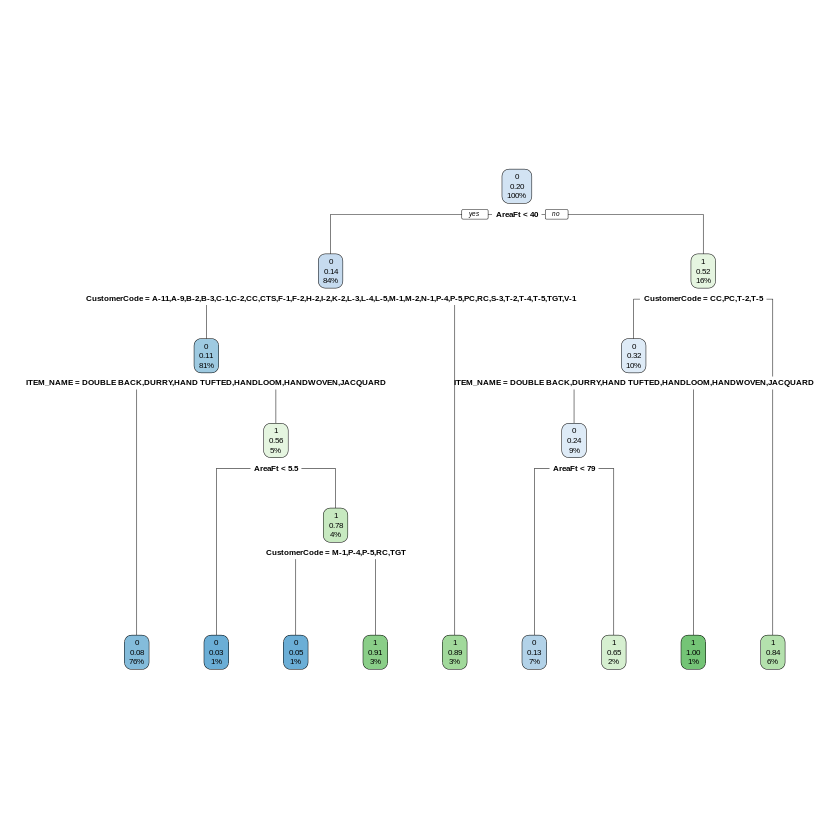

In [ ]:
####Decision Tree for DataonSample####
      set.seed(122)
      library(ISLR)
      data(DataOnSample)
      indx <- sample(2,nrow(DataOnSample),replace = TRUE,prob=c(0.7,0.3))
      train <- DataOnSample[indx==1,]
      test <- DataOnSample[indx==2,]
      
      library(rpart)
      library(rpart.plot)
      myFormula = `Order Conversion`~.
      
      
      SampleonlyTree<- rpart(myFormula, data = train, control = rpart.control(minsplit = 14, minbucket = 10, maxdepth = 20, cp = 0.011), parms = list(split="gini"))
      SampleonlyTree
      
      #Displaying it better
      library(rpart.plot)
      rpart.plot(SampleonlyTree)
      

### We have used Decision tree to identify the important attributes that determine the conversion of samples sent to the customers.

From this we find out that the main attributes are 
Analysis attributes: 

1.  CustomerCode  
2.  QtyRequired  
3.  ItemName 
4.  ShapeName 
5.  AreaFt 
6.  OrderConversion (dependent variable) 

### Accuracy of the model is 91.74%.

In [ ]:
pacman::p_load("pacman","tidyverse","rpart","rpart.plot","readxl","base")
install.packages("scales")   
install.packages("cluster")   
install.packages("factoextra")   
library(scales)
library(cluster)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘car’, ‘rstatix’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
#Data for Clustering
#DataForClustering <- read_xlsx("Champo.xlsx",sheet = 6)
#Checking for NA values in clustering dataset
sum(is.na(DataForClustering))
summary(DataForClustering)
#getting our data 
head(DataForClustering,n=6)
str(DataForClustering)
DataForClustering<-na.omit(DataForClustering)
#Removing a column
namesofrow <- DataForClustering$`Row Labels`
rownames(DataForClustering) <- namesofrow
DataForClustering <- DataForClustering[,-1]
rownames(DataForClustering)<- namesofrow
#DataForClustering$`Row Labels` <- as.factor(DataForClustering$`Row Labels`)
#Normalizing our instances
library(dplyr)
myscale <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
data <- DataForClustering %>% mutate_if(is.numeric, myscale)
data
#Using the k-means clustering to derive insights
library(factoextra)
km1 <- kmeans(data, centers = 6, nstart = 100)
km1
str(km1)
      


[1] 0

  Row Labels        Sum of QtyRequired Sum of TotalArea    Sum of Amount     
 Length:45          Min.   :     2     Min.   :     1.35   Min.   :     329  
 Class :character   1st Qu.:   565     1st Qu.:   376.77   1st Qu.:   39701  
 Mode  :character   Median :  1566     Median :  2120.00   Median :  116778  
                    Mean   : 12978     Mean   : 13056.59   Mean   :  698210  
                    3rd Qu.: 11146     3rd Qu.:  8451.56   3rd Qu.:  426626  
                    Max.   :183206     Max.   :209725.22   Max.   :11341053  
     DURRY           HANDLOOM       DOUBLE BACK        JACQUARD     
 Min.   :     0   Min.   :   0.0   Min.   :   0.0   Min.   :  0.00  
 1st Qu.:     0   1st Qu.:   0.0   1st Qu.:   0.0   1st Qu.:  0.00  
 Median :   289   Median :   0.0   Median :   0.0   Median :  0.00  
 Mean   :  7103   Mean   : 185.5   Mean   : 407.9   Mean   : 89.42  
 3rd Qu.:  1560   3rd Qu.:   0.0   3rd Qu.: 175.0   3rd Qu.: 72.00  
 Max.   :139618   Max.   :3673.0   Max. 

Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A-11,2466,139.5900,185404.10,1021,1445,0,0,0,0,0,0,0,0
A-6,131,2086.0000,6247.46,0,0,25,106,0,0,0,0,0,0
A-9,18923,53625.6544,1592079.79,3585,0,175,714,11716,2116,617,0,0,0
B-2,624,202.8987,14811.16,581,0,0,2,0,41,0,0,0,0
B-3,464,8451.5625,58626.87,0,0,459,5,0,0,0,0,0,0
B-4,692,3244.2500,26242.50,80,102,0,0,510,0,0,0,0,0


tibble [45 × 14] (S3: tbl_df/tbl/data.frame)
 $ Row Labels        : chr [1:45] "A-11" "A-6" "A-9" "B-2" ...
 $ Sum of QtyRequired: num [1:45] 2466 131 18923 624 464 ...
 $ Sum of TotalArea  : num [1:45] 140 2086 53626 203 8452 ...
 $ Sum of Amount     : num [1:45] 185404 6247 1592080 14811 58627 ...
 $ DURRY             : num [1:45] 1021 0 3585 581 0 ...
 $ HANDLOOM          : num [1:45] 1445 0 0 0 0 ...
 $ DOUBLE BACK       : num [1:45] 0 25 175 0 459 0 0 0 0 3 ...
 $ JACQUARD          : num [1:45] 0 106 714 2 5 0 0 0 0 0 ...
 $ HAND TUFTED       : num [1:45] 0 0 11716 0 0 ...
 $ HAND WOVEN        : num [1:45] 0 0 2116 41 0 ...
 $ KNOTTED           : num [1:45] 0 0 617 0 0 0 453 0 0 0 ...
 $ GUN TUFTED        : num [1:45] 0 0 0 0 0 0 0 0 0 19 ...
 $ Powerloom Jacquard: num [1:45] 0 0 0 0 0 0 0 0 0 0 ...
 $ INDO TEBETAN      : num [1:45] 0 0 0 0 0 0 0 0 0 0 ...


Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.344949e-02,6.591524e-04,1.631953e-02,0.0073128107,0.39341138,0.000000000,0.000000000,0.000000000,0.000000e+00,0.000000000,0.0000000,0,0.0
7.041331e-04,9.939975e-03,5.218878e-04,0.0000000000,0.00000000,0.004596433,0.148459384,0.000000000,0.000000e+00,0.000000000,0.0000000,0,0.0
1.032783e-01,2.556900e-01,1.403571e-01,0.0256772049,0.00000000,0.032175032,1.000000000,0.193062536,1.478273e-01,0.064933698,0.0000000,0,0.0
3.395122e-03,9.610194e-04,1.277016e-03,0.0041613546,0.00000000,0.000000000,0.002801120,0.000000000,2.864329e-03,0.000000000,0.0000000,0,0.0
2.521779e-03,4.029209e-02,5.140588e-03,0.0000000000,0.00000000,0.084390513,0.007002801,0.000000000,0.000000e+00,0.000000000,0.0000000,0,0.0
3.766293e-03,1.546271e-02,2.285006e-03,0.0005729920,0.02777022,0.000000000,0.000000000,0.008404054,0.000000e+00,0.000000000,0.0000000,0,0.0
2.802886e-02,2.992588e-01,5.002254e-02,0.0020627713,0.00000000,0.000000000,0.000000000,0.068814369,1.536957e-02,0.047674174,0.0000000,0,0.0
3.011397e-01,4.533890e-02,1.372747e-01,0.2653096306,0.00000000,0.000000000,0.000000000,0.062882096,1.000000e+00,0.000000000,0.0000000,0,0.0
8.536932e-03,1.914255e-02,8.706100e-03,0.0088813763,0.00000000,0.000000000,0.000000000,0.005372003,0.000000e+00,0.000000000,0.0000000,0,0.0


K-means clustering with 6 clusters of sizes 3, 5, 2, 1, 32, 2

Cluster means:
  Sum of QtyRequired Sum of TotalArea Sum of Amount      DURRY   HANDLOOM
1         0.26036367      0.076379689    0.40698651 0.11757080 0.00000000
2         0.06028580      0.065044358    0.06897577 0.01757510 0.04290770
3         0.04533198      0.007526745    0.04263264 0.03670372 0.07187585
4         1.00000000      0.092998692    0.33546999 1.00000000 1.00000000
5         0.02059623      0.023717593    0.01060837 0.01831896 0.01818166
6         0.17744700      0.689929357    0.22157557 0.09457591 0.16648516
  DOUBLE BACK   JACQUARD HAND TUFTED  HAND WOVEN    KNOTTED  GUN TUFTED
1  0.00000000 0.00000000  0.43693389 0.333333333 0.00000000 0.000000000
2  0.16120610 0.65294118  0.08062948 0.123683107 0.04312776 0.030769231
3  0.15223387 0.03501401  0.02171871 0.033289088 0.02041675 0.312820513
4  0.00000000 0.77030812  0.43852682 0.209585022 0.00000000 0.000000000
5  0.01255975 0.02976190  0.01337851 0.00764

List of 9
 $ cluster     : int [1:45] 5 5 2 5 5 5 5 1 5 5 ...
 $ centers     : num [1:6, 1:13] 0.2604 0.0603 0.0453 1 0.0206 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:13] "Sum of QtyRequired" "Sum of TotalArea" "Sum of Amount" "DURRY" ...
 $ totss       : num 17.7
 $ withinss    : num [1:6] 1.794 0.765 0.298 0 0.652 ...
 $ tot.withinss: num 4.57
 $ betweenss   : num 13.1
 $ size        : int [1:6] 3 5 2 1 32 2
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


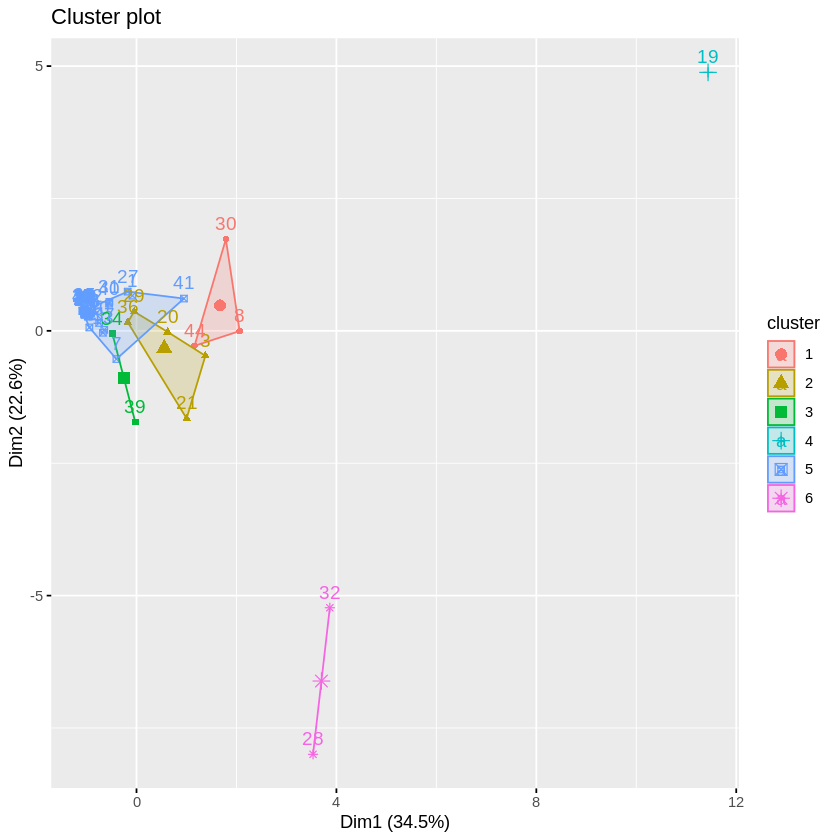

In [ ]:
#Using fviz_cluster to show all the clusters
fviz_cluster(km1, data = data)

Identifying  similar  customers  and  sending  samples  accordingly,  in  order  to ensure order conversion after sample testing.  



•  Below are some target strategies based on clustering: 
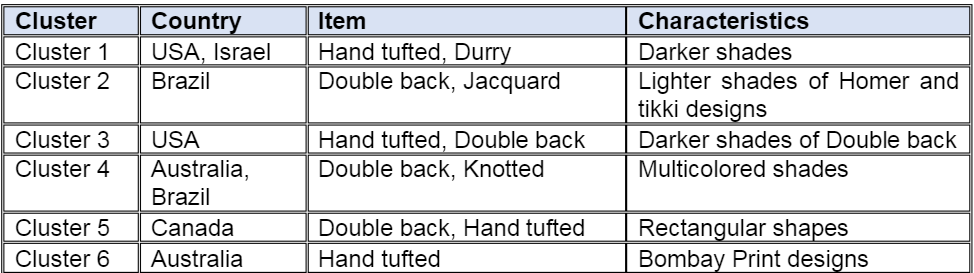




In [ ]:
set.seed(123)
# function to compute total within-cluster sum of square
wss <- function(k) {
  kmeans(data, centers = k, nstart = 100)$tot.withinss
}

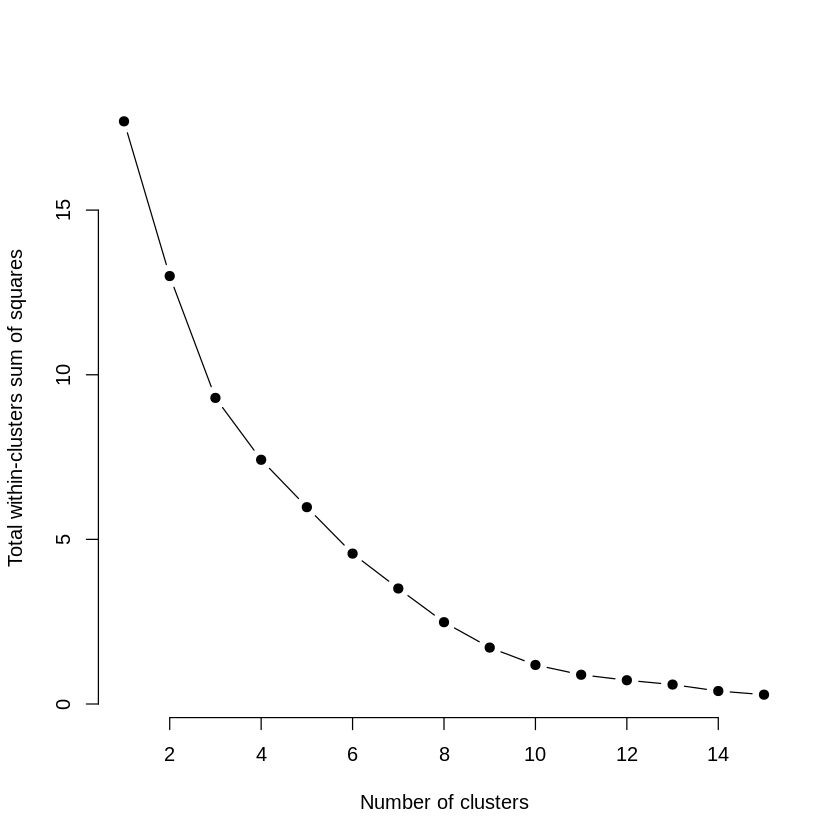

In [ ]:
k.values <- 1:15
library(tidyverse)
wss_values <- map_dbl(k.values, wss)
plot(k.values, wss_values,
     type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters",
     ylab="Total within-clusters sum of squares")

Based on the results from K-means clustering optimal number of clusters are six.    

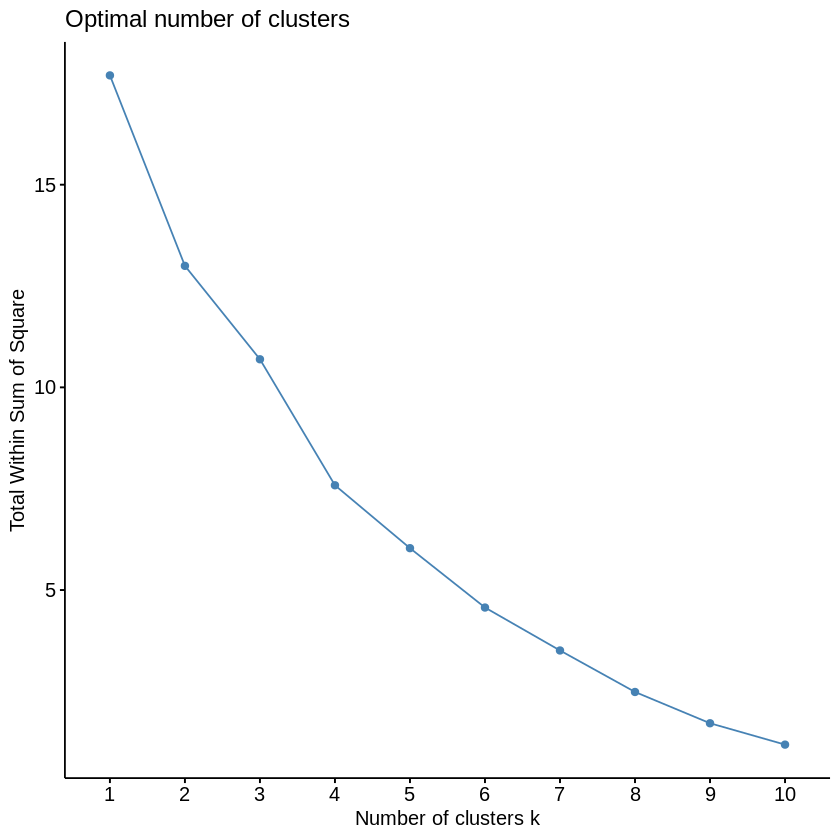

In [ ]:
#To get the scree plot, we can also use the “fviz_nbclust” function.
set.seed(123)
fviz_nbclust(data, kmeans, method = "wss")

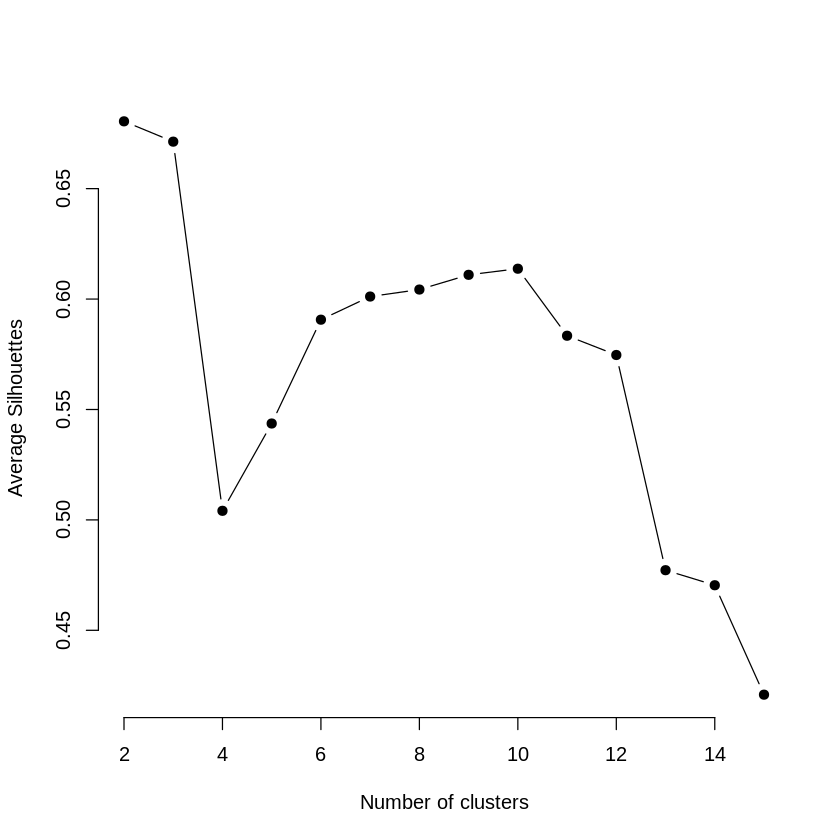

In [ ]:
# function to compute average silhouette for k clusters
library(cluster)
avgsil <- function(k) {
  kmModel <- kmeans(data, centers = k, nstart = 100)
  ss <- silhouette(kmModel$cluster, dist(data))
  mean(ss[, 3])
}
# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15
# extract avg silhouette for 2-15 clusters
avgsil_values <- map_dbl(k.values, avgsil)
plot(k.values, avgsil_values,
     type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters",
     ylab = "Average Silhouettes")

Cluster,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.26036367,0.076379689,0.40698651,0.11757080,0.00000000,0.00000000,0.00000000,0.43693389,0.333333333,0.00000000,0.000000000,0,0.0
2,0.06028580,0.065044358,0.06897577,0.01757510,0.04290770,0.16120610,0.65294118,0.08062948,0.123683107,0.04312776,0.030769231,0,0.0
3,0.04533198,0.007526745,0.04263264,0.03670372,0.07187585,0.15223387,0.03501401,0.02171871,0.033289088,0.02041675,0.312820513,0,0.8
4,1.00000000,0.092998692,0.33546999,1.00000000,1.00000000,0.00000000,0.77030812,0.43852682,0.209585022,0.00000000,0.000000000,1,0.0
5,0.02059623,0.023717593,0.01060837,0.01831896,0.01818166,0.01255975,0.02976190,0.01337851,0.007645487,0.00294017,0.003044872,0,0.0
6,0.17744700,0.689929357,0.22157557,0.09457591,0.16648516,0.93123736,0.28921569,0.04160007,0.294292301,0.69080194,0.500000000,0,0.0


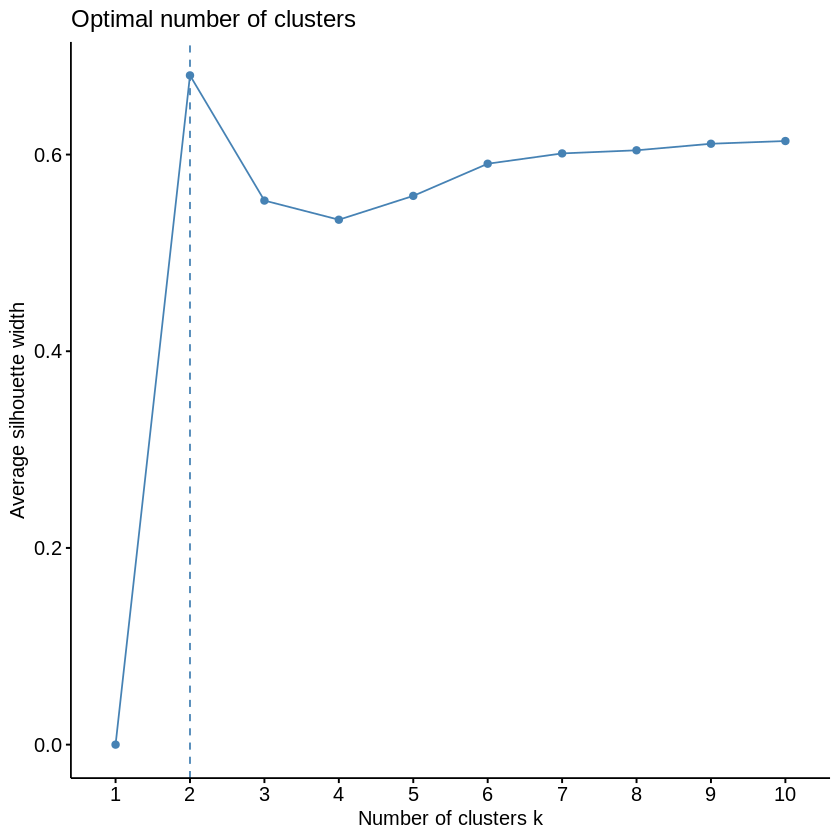

In [ ]:
#Similar to the elbow method, the “average silhoutte method” can be found in fviz_nbclust function.
fviz_nbclust(data, kmeans, method = "silhouette")

data %>%
    mutate(Cluster = km1$cluster) %>%
    group_by(Cluster) %>%
    summarise_all("mean")